# Introduction au Machine Learning sur Python

## Installation des libraires

In [ ]:
#Pip install installe la majorité des librairies python

!pip install pandas

In [36]:
#Au début de chaque notebook, il faut importer les différentes librairies.

import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
%matplotlib inline

## Importation des données

#### On importe un jeu de données. Celui-ci contient différentes observations (Les lignes) et différents attributs/features pour chaque valeur (Les colonnes)

Ce jeu de donnée contient 50 lignes de 3 espèces d'iris différentes (150 lignes au total)
Pour chaque lignes, on a les mesures suivantes : sepal length, sepal width, petal length, petal width

In [14]:
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
# Chaque observation est labélisé en fonction de l'espèce d'iris auquel elle appartient
# Les 3 classes sont les suivantes : 'setosa' 'versicolor' 'virginica' labélisé dans l'ordre 0, 1 ou 2
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
# On peut rajouter à notre dataframe le label auquel elle corresponde

data = pd.concat([data,pd.Series(iris.target, name ="label")], axis=1)

## Quelques statistiques de base

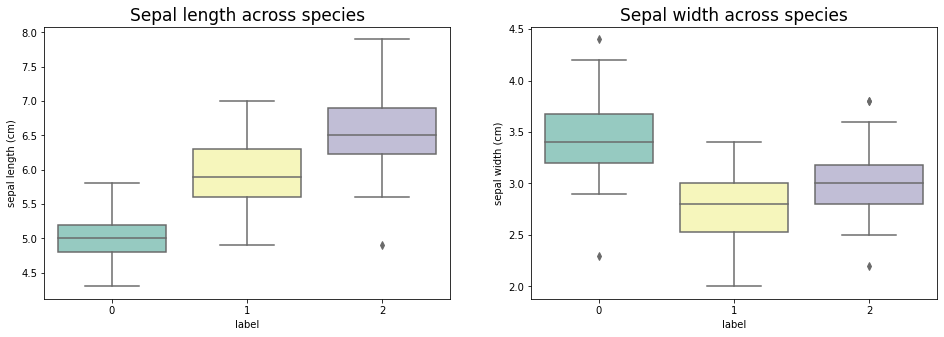

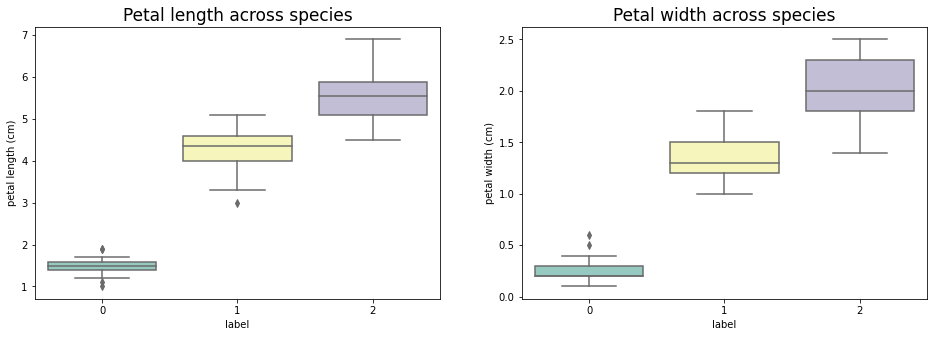

In [57]:
# comparaison des 3 catégories pour chaque features

# On précise a python qu'on souhaite afficher 2 graphiques l'un a côté de l'autre, en spécifiant leur taille
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5)) 

# On affiche des boxplot et on rajoute un titre
ax = sns.boxplot(x="label", y="sepal length (cm)",data=data, palette="Set3", ax = ax1).set_title("Sepal length across species",fontsize=17)
ax = sns.boxplot(x="label", y="sepal width (cm)",data=data, palette="Set3", ax = ax2).set_title("Sepal width across species",fontsize=17)


fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))

# On affiche des boxplot et on rajoute un titre
ax = sns.boxplot(x="label", y="petal length (cm)",data=data, palette="Set3", ax = ax1).set_title("Petal length across species",fontsize=17)
ax = sns.boxplot(x="label", y="petal width (cm)",data=data, palette="Set3", ax = ax2).set_title("Petal width across species",fontsize=17)

#On affiche nos graphiques
plt.show() 

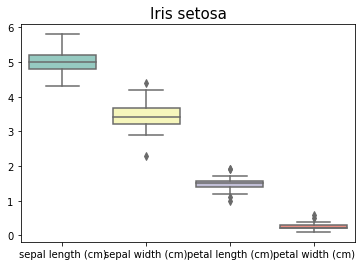

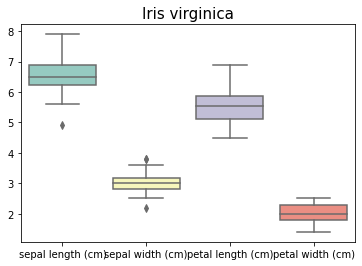

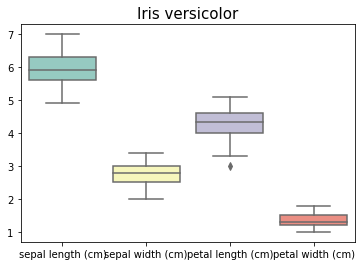

In [63]:

# On effectue un filtre sur le dataset et on supprime la colonne label
iris_setosa = data[data['label'] == 0].drop(['label'],axis=1)
iris_versicolor = data[data['label'] == 1].drop(['label'],axis=1)
iris_virginica = data[data['label'] == 2].drop(['label'],axis=1)

#On affiche les boxplots relative à chaque espèce de iris
ax = sns.boxplot(data=iris_setosa, orient="v", palette="Set3").set_title("Iris setosa",fontsize=15)
plt.show()

ax = sns.boxplot(data=iris_virginica, orient="v",palette="Set3").set_title("Iris virginica",fontsize=15)
plt.show()

ax = sns.boxplot(data=iris_versicolor, orient="v",palette="Set3").set_title("Iris versicolor",fontsize=15)
plt.show()

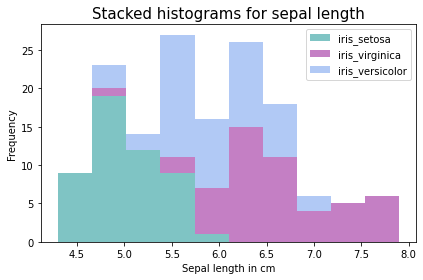

In [65]:
# Histogram 
# On remarque clairement des différences entre les espèces
colors = ['darkcyan', 'darkmagenta', 'cornflowerblue']
names = ['iris_setosa', 'iris_virginica', 'iris_versicolor']

plt.hist([iris_setosa["sepal length (cm)"], iris_virginica["sepal length (cm)"], 
          iris_versicolor["sepal length (cm)"]],
          stacked=True, color = colors, label=names,alpha=0.5) 


# Plot formatting
plt.legend()
plt.title("Stacked histograms for sepal length",fontsize=15)

plt.xlabel('Sepal length in cm')
plt.ylabel('Frequency')

plt.tight_layout()

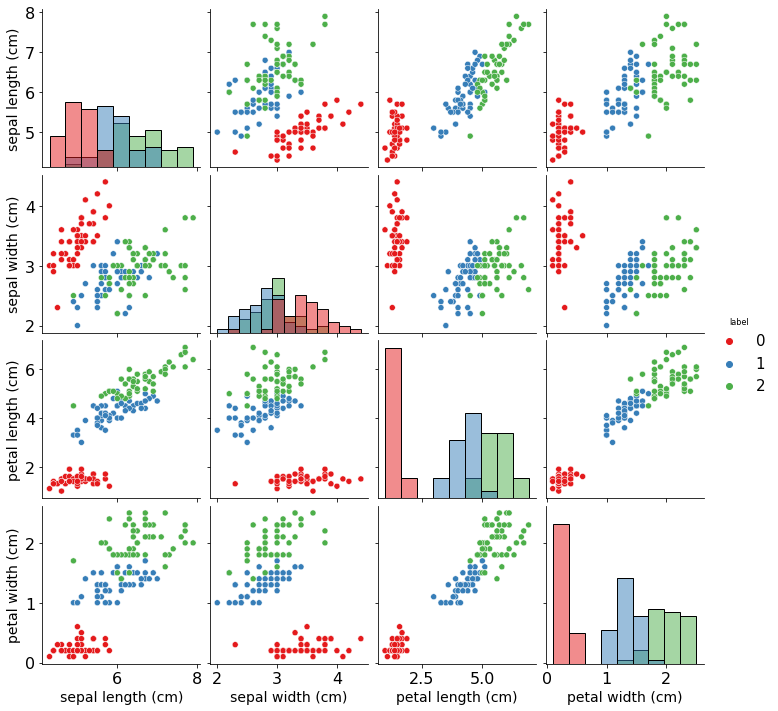

In [83]:
#pairplot
ax = sns.pairplot(data,hue="label",diag_kind="hist", palette = "Set1")

plt.show()

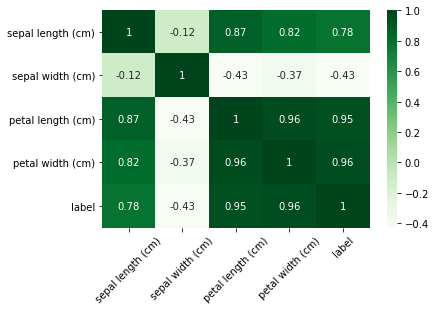

In [67]:
# Matrice de corrélation
corrMatrix = data.corr(method='pearson')

sns.heatmap(corrMatrix, annot=True, cmap="Greens")
plt.xticks(rotation=45)
plt.show()

## Place au machine learning

In [84]:
# On va essayer de prédire l'espèce a laquelle appartient une observation en fonction de ces attributs
# Pour cela, on utilise une méthode supervisée, i.e qu'on entraine notre algorithme sur des données labélisés
# afin de le tester sur des données non labélisés

# On commence par séparer nos données en deux, d'un côté les données d'entrainement (train) et de l'autre les données 
# de test (test)

from sklearn.model_selection import train_test_split

# Notre X va correspondre aux attributs de nos données, ce sont les features
X = data.drop(['label'],axis =1)

# Notre y va correspondre au label de nos données, c'est l'attribut qu'on cherche à prédire
y = data['label']


# On sépare nos données d'entrainement tout en séparant le label de nos features, on obtient donc 4 data frame
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30)

In [93]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
45,4.8,3.0,1.4,0.3
70,5.9,3.2,4.8,1.8
98,5.1,2.5,3.0,1.1
131,7.9,3.8,6.4,2.0
123,6.3,2.7,4.9,1.8


In [92]:
y_train.head()

45     0
70     1
98     1
131    2
123    2
Name: label, dtype: int32

In [91]:
X_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
1,4.9,3.0,1.4,0.2
83,6.0,2.7,5.1,1.6
4,5.0,3.6,1.4,0.2
57,4.9,2.4,3.3,1.0
125,7.2,3.2,6.0,1.8


In [90]:
y_test.head()

1      0
83     1
4      0
57     1
125    2
Name: label, dtype: int32

In [94]:
# On va effectuer une classification classique en utilisant la méthode des k plus proches voisins
from sklearn.neighbors import KNeighborsClassifier

# On cherche le n le plus efficace pour appliqué la méthode
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

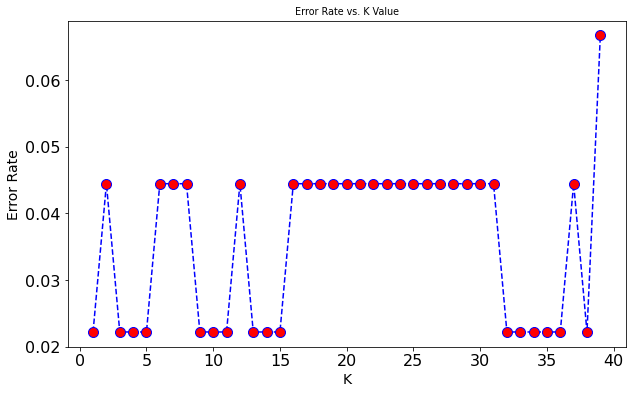

In [95]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [98]:
# On crée le modèle
knn = KNeighborsClassifier(n_neighbors=4)

# On l'entraine sur nos données d'entrainement
knn.fit(X_train,y_train)

# Une fois entrainé, on effectue une prédiction
pred = knn.predict(X_test)

In [100]:
from sklearn.metrics import classification_report,confusion_matrix

print('\n')
# Matrice de confusion
print(confusion_matrix(y_test,pred))
print('\n')
# On regarde la précision, le rappel et le f1-score
print(classification_report(y_test,pred))

WITH K=4


[[21  0  0]
 [ 0 12  1]
 [ 0  0 11]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.92      0.96        13
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

